# Solution to exercises from <i>Hands On Machine Learning</i> chapter 5

In [155]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 8
Generating linearly separatable data

(-5.0, 5.0)

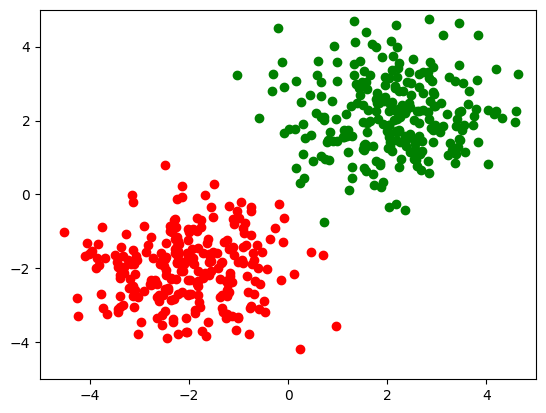

In [156]:
m = 500

np.random.seed(8)

X1 = np.random.randn(int(m/2), 2) + 2.1*np.ones([int(m/2),2])
X2 = np.random.randn(int(m/2), 2) - 2.1*np.ones([int(m/2),2])
X = np.r_[X1, X2]
y = np.r_[np.zeros([int(m/2)]), np.ones([int(m/2)])]

xs1 = np.linspace(-2, 2, 100)
xs2 = np.linspace(-2, 2, 100)


plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
plt.scatter(X[y==0, 0], X[y==0, 1], c='g')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [158]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)


LinearSVC()

In [159]:
y_pred_t = lin_svc.predict(X_train)

acc = len(y_pred_t[y_pred_t==y_train])/len(y_pred_t)
acc


1.0

In [164]:
y_pred = lin_svc.predict(X_test)
y_decision = lin_svc.decision_function(X_test)
acc = len(y_pred[y_pred==y_test])/len(y_pred)
acc

1.0

In [161]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # svs = svm_clf.support_vectors_
    # plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

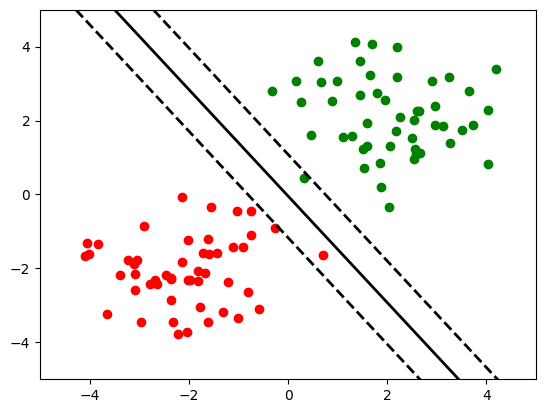

In [165]:

def plot_predicitons(svc, y_pred):
    x0, x1 = np.meshgrid(xs1, xs2)

    plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='r')
    plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='g')
    plt.scatter(X_test[y_test!=y_pred, 0], X_test[y_test!=y_pred, 1], c='b', s=100, alpha=0.3)
    plot_svc_decision_boundary(svc, -5, 5)
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.show()

plot_predicitons(lin_svc, y_pred)


In [175]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

y_pred_t = svc.predict(X_train)

acc = len(y_pred_t[y_pred_t==y_train])/len(y_pred_t)
acc


1.0

In [176]:
y_pred = svc.predict(X_test)
y_decision = svc.decision_function(X_test)
acc = len(y_pred[y_pred==y_test])/len(y_pred)
acc

1.0

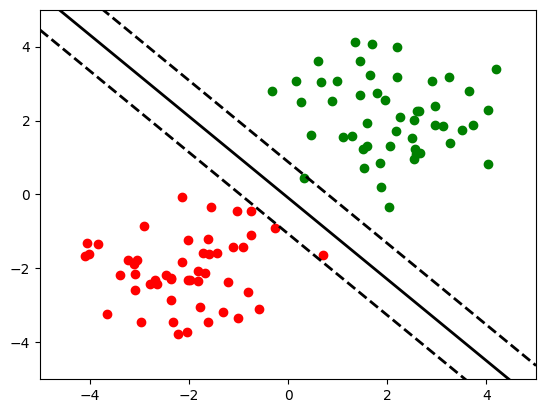

In [177]:
plot_predicitons(svc, y_pred)

In [179]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

y_pred_t = sgd_clf.predict(X_train)

acc = len(y_pred_t[y_pred_t==y_train])/len(y_pred_t)
acc

1.0

In [180]:
y_pred = sgd_clf.predict(X_test)
y_decision = sgd_clf.decision_function(X_test)
acc = len(y_pred[y_pred==y_test])/len(y_pred)
acc

1.0

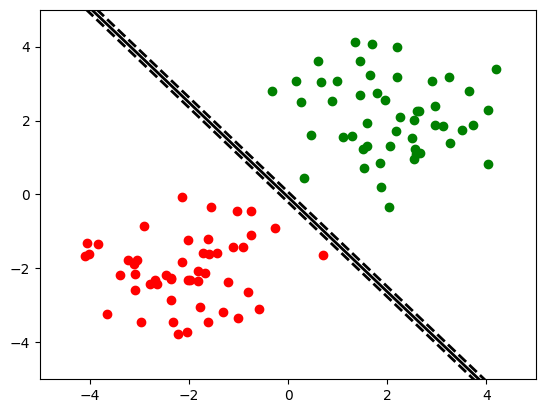

In [181]:
plot_predicitons(sgd_clf, y_pred)